In [52]:
import os
import sys
from datetime import datetime
import numpy as np
from numpy.random import seed
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras import backend as K
from tensorflow import set_random_seed
from tensorflow.keras.models import Model

from core.utils_nn import parse_file, load_gray_image, load_color_image, get_model_path, get_folder_name
from core.generator import ConfigurationGenerator, Generator, AttacksGenerator
import pickle

import shap

In [87]:
absp = '../__xray_age_new_20-35_50-70_'

model_name = 'inceptionv3'
batch_size = 25
images_are_colored = False
n_classes = 2
test_file = 'test.txt'
pred_test_file = 'pred_test.pkl'

attacks_folder = '/media/data10T_1/datasets/Voynov/__attacks__/'

In [88]:
paths, labels = parse_file(os.path.join(absp, test_file))

In [89]:
attacks_generator = AttacksGenerator(os.path.join(attacks_folder, 
                                                  get_folder_name(absp), 
                                                  model_name), 
                                     images_are_colored, 
                                     batch_size=batch_size)

In [90]:
load_image = load_color_image if images_are_colored else load_gray_image

start = 0
n = 6
n_bg = 20
n_imgs = [load_image(p) for p in paths[start: start + n // 2]]
background = [load_image(p) for p in paths[start: start + n_bg]]
a_imgs = attacks_generator[0][:n // 2]
imgs = [0] * 6
imgs[::2] = n_imgs
imgs[1::2] = a_imgs

In [91]:
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
model_path = get_model_path(absp, model_name=model_name)
model = load_model(model_path)

W1003 15:26:56.720277 140111344342848 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


In [92]:
exp = shap.DeepExplainer(model, np.array(background))

In [93]:
shap_values = exp.shap_values(np.array(imgs))

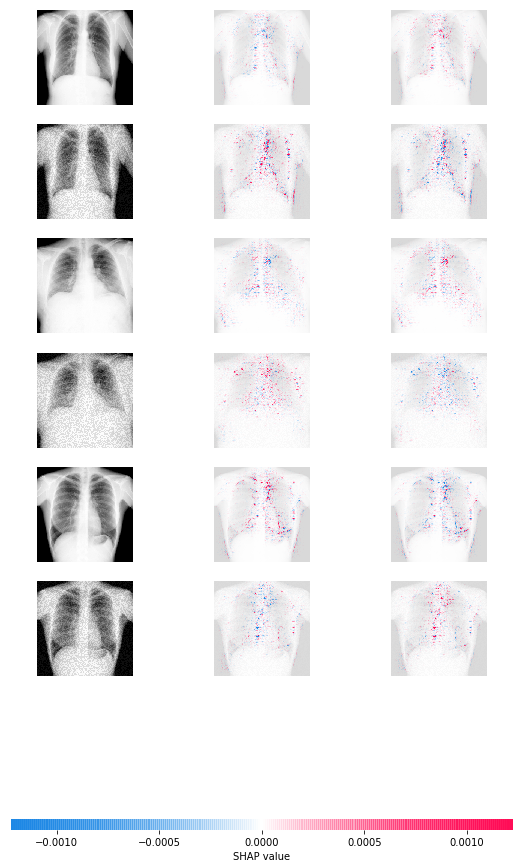

In [94]:
shap.image_plot(shap_values, np.array(imgs))